In [32]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyCompare

In [33]:
df = pd.read_csv("data.csv")
type = "sleep"
property = "averageHR"
df.tail()

,bedtimeStart,Date,bedtimeEnd,Type,Provider,sleepScore,date,lightSleepDuration,sleepLatency,sleepEfficiency,...,remSleepDuration,CreatedAt,type,totalSleepDuration,averageHR,intenseActivity,caloriesBurned,steps,moderateActivity,softActivity
388,NaN,2024-03-22,NaN,activity_Withings,Withings,NaN,2024-03-22,NaN,NaN,NaN,...,NaN,1711322253,activity,NaN,NaN,0.0,426.860,6115.0,4740.0,960.0
389,NaN,2024-03-23,NaN,activity_Withings,Withings,NaN,2024-03-23,NaN,NaN,NaN,...,NaN,1711322255,activity,NaN,NaN,0.0,25.720,687.0,60.0,1080.0
390,NaN,2024-03-24,NaN,activity_Withings,Withings,NaN,2024-03-24,NaN,NaN,NaN,...,NaN,1711416912,activity,NaN,NaN,0.0,17.330,475.0,60.0,1080.0
391,NaN,2024-03-25,NaN,activity_Withings,Withings,NaN,2024-03-25,NaN,NaN,NaN,...,NaN,1711479655,activity,NaN,NaN,0.0,809.106,9690.0,8938.0,2880.0
392,NaN,2024-03-26,NaN,activity_Withings,Withings,NaN,2024-03-26,NaN,NaN,NaN,...,NaN,1711490235,activity,NaN,NaN,0.0,262.195,5173.0,2640.0,3000.0


In [34]:
categoriesSleep = ["sleepScore", "lightSleepDuration", "sleepLatency", "sleepEfficiency", "totalSleepDuration", "averageHR" ]
categoriesActivity = ["intenseActivity",
            "caloriesBurned", "steps", "moderateActivity", "softActivity"]
Q = 0
N = 0
for property in categoriesSleep:
    df_oura = df.loc[df["Type"] == f"sleep_Oura"]
    df_withings = df.loc[df["Type"] == f"sleep_Withings"]
    df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
    df_oura = df_oura[df_oura[property].notna()]
    df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
    df_withings = df_withings[df_withings[property].notna()]
    for i, row in df_oura.iterrows():
        row = row.to_dict()
        a = row[property]
        b = df_withings.loc[df_withings["date"] == row["date"]]
        b = b.iloc[0][property]
        N += 1
        Q += (max(b, a) / min(b, a) % 1)

for property in categoriesActivity:
    df_oura = df.loc[df["Type"] == f"activity_Oura"]
    df_withings = df.loc[df["Type"] == f"activity_Withings"]
    df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
    df_oura = df_oura[df_oura[property].notna()]
    df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
    df_withings = df_withings[df_withings[property].notna()]
    for i, row in df_oura.iterrows():
        row = row.to_dict()
        a = row[property]
        b = df_withings.loc[df_withings["date"] == row["date"]]
        b = b.iloc[0][property]
        if (min(b, a) == 0):
            continue
        N += 1
        Q += (max(b, a) / min(b, a) % 1)

print(Q / N)

0.2743152674770375


In [35]:
df_oura = df.loc[df["Type"] == f"{type}_Oura"]
df_withings = df.loc[df["Type"] == f"{type}_Withings"]
df_oura = df_oura[df_oura["date"].isin(df_withings["date"])]
df_oura = df_oura[df_oura[property].notna()]
df_withings = df_withings[df_withings["date"].isin(df_oura["date"])]
df_withings = df_withings[df_withings[property].notna()]
df_withings.tail()


,bedtimeStart,Date,bedtimeEnd,Type,Provider,sleepScore,date,lightSleepDuration,sleepLatency,sleepEfficiency,...,remSleepDuration,CreatedAt,type,totalSleepDuration,averageHR,intenseActivity,caloriesBurned,steps,moderateActivity,softActivity


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from numpy.random import random

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel("Means")
    plt.ylabel("Difference")
    plt.ylim(md - 3.5*sd, md + 3.5*sd)

    xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

    plt.text(xOutPlot, md - 1.96*sd, 
        r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md + 1.96*sd, 
        r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
        ha = "center",
        va = "center",
        )
    plt.text(xOutPlot, md, 
        r'Mean:' + "\n" + "%.2f" % md, 
        ha = "center",
        va = "center",
        )
    plt.subplots_adjust(right=0.85)



[]


c:\Py3.10\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Py3.10\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Py3.10\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Py3.10\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Py3.10\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Axis limits cannot be NaN or Inf

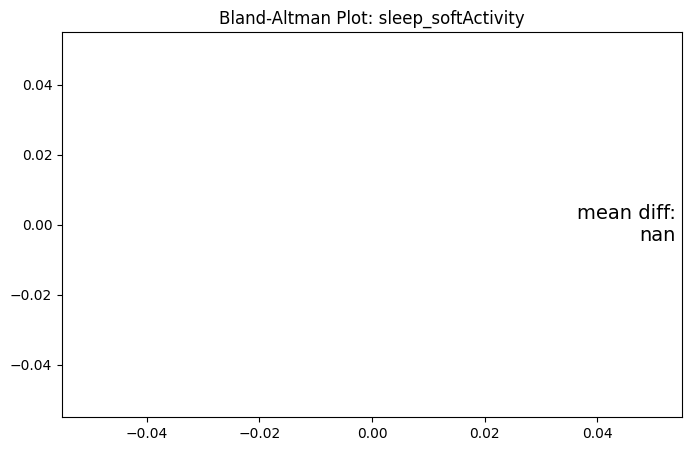

In [37]:

a = df_oura[property].values
b = df_withings[property].values
print(df_withings[property].values)
f, ax = plt.subplots(1, figsize = (8, 5))
plt.title(f"Bland-Altman Plot: {type}_{property}")
sm.graphics.mean_diff_plot(a, b, ax=ax)
plt.show()

In [ ]:
categories = [""]